In [1]:
from datasets import load_dataset
import re
from collections import Counter
from matplotlib import pyplot as plt



/Users/bochnak/anaconda3/envs/nlp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("clarin-knext/fiqa-pl", "corpus")

In [3]:
ds["corpus"]

Dataset({
    features: ['_id', 'title', 'text'],
    num_rows: 57638
})

In [4]:
ds["corpus"]["text"][:2]

['Nie mówię, że nie podoba mi się też pomysł szkolenia w miejscu pracy, ale nie możesz oczekiwać, że firma to zrobi. Szkolenie pracowników to nie ich praca – oni tworzą oprogramowanie. Być może systemy edukacyjne w Stanach Zjednoczonych (lub ich studenci) powinny trochę martwić się o zdobycie umiejętności rynkowych w zamian za ich ogromne inwestycje w edukację, zamiast wychodzić z tysiącami zadłużonych studentów i narzekać, że nie są do niczego wykwalifikowani.',
 'Tak więc nic nie zapobiega fałszywym ocenom poza dodatkową kontrolą ze strony rynku/inwestorów, ale istnieją pewne nowsze kontrole, które uniemożliwiają instytucjom korzystanie z nich. W ramach DFA banki nie mogą już polegać wyłącznie na ratingach kredytowych jako należytej staranności przy zakupie instrumentu finansowego, więc to jest plus. Intencją jest to, że jeśli instytucje finansowe wykonują swoją własną pracę, to *być może* dojdą do wniosku, że określony CDO jest śmieciem, czy nie. Edycja: wprowadzenie']

##### Devise two regular expressions & search for occurrences of times and dates in the dataset.

In [5]:

def regex_pattern(data, pattern: str):
    return [match for line in data for match in re.findall(pattern, line)]

# Regular expression patterns
time_pattern = r'\b([01]?[0-9]|2[0-3]):[0-5][0-9]\b' # works for H:MM and HH:MM formats

# Used GPT to generate varieties of Polish month names
day_month_pattern = r'\d{1,2} \b(?:stycze(?:ń|nia|niowi|niem|niu)|luty|lute(?:go|mu)|mar(?:zec|ca|cowi|cem|cu)|kwiecie(?:ń|nia|niowi|niem|niu)|ma(?:j|ja|jowi|jem|ju)|czerw(?:iec|ca|cowi|cem|cu)|lip(?:iec|ca|cowi|cem|cu)|sierp(?:ień|nia|niowi|niem|niu)|wrze(?:sien|śnia|sniowi|sniem|sniu)|paździer(?:nik|nika|nikowi|nikiem|niku)|list(?:opad|opada|opadowi|opadem|opadzie)|grud(?:zień|nia|niowi|niem|niu))\b'

lines = ds["corpus"]["text"]

time_results = regex_pattern(lines, time_pattern)

day_month_results = regex_pattern(lines, day_month_pattern)

In [6]:
time_results[:10] # results already with hour

['17', '17', '6', '20', '17', '22', '12', '17', '15', '5']

In [7]:
day_month_results[:5]

['1 czerwca', '1 sierpnia', '1 sierpnia', '1 grudnia', '1 grudnia']

In [8]:
# Hour mapping # change all 01-09 to 1-9
for i, hour in zip(range(len(time_results)), time_results):
    if len(hour) == 2 and hour[0] == '0':
        time_results[i] += hour[1]

In [9]:
# TODO: temporary remove if len > 2
time_results = filter(lambda x: len(x) <= 2, time_results)

In [10]:
hour_counts = Counter(time_results)
hour_counts

Counter({'0': 37,
         '17': 34,
         '15': 26,
         '16': 26,
         '1': 23,
         '22': 19,
         '19': 19,
         '9': 19,
         '20': 18,
         '13': 17,
         '14': 16,
         '18': 16,
         '11': 16,
         '4': 15,
         '12': 14,
         '8': 14,
         '23': 14,
         '5': 11,
         '3': 11,
         '6': 10,
         '2': 10,
         '10': 8,
         '21': 7,
         '7': 6})

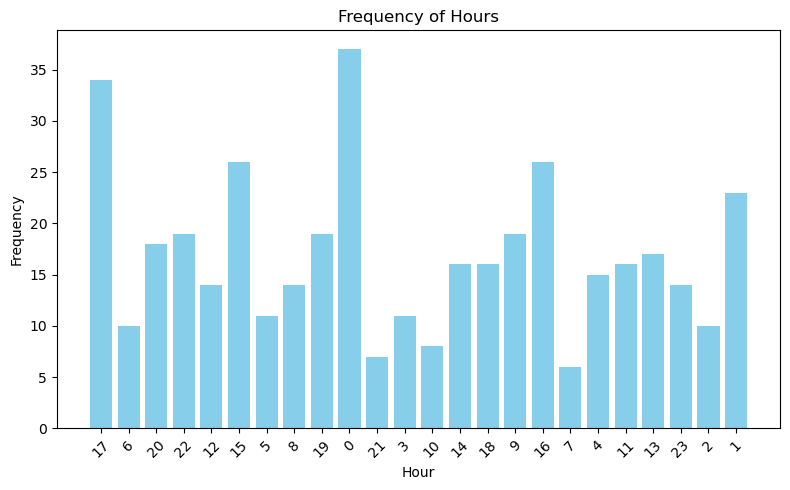

In [11]:
xs, ys = zip(*hour_counts.items())

plt.figure(figsize=(8, 5)) 
plt.bar(xs, ys, color='skyblue')

plt.title("Frequency of Hours")
plt.xlabel("Hour")
plt.ylabel("Frequency")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Used GPT to generate varieties of Polish month names
month_mapping = {
    "styczeń": ["styczeń", "stycznia", "styczniowi", "styczniem", "styczniu"],
    "luty": ["luty", "lutego", "lutym", "lutym"],
    "marzec": ["marzec", "marca", "marcu", "marcem"],
    "kwiecień": ["kwiecień", "kwietnia", "kwietniowi", "kwietniem", "kwietniu"],
    "maj": ["maj", "maja", "majem", "maju"],
    "czerwiec": ["czerwiec", "czerwca", "czerwcowi", "czerwcem", "czerwcu"],
    "lipiec": ["lipiec", "lipca", "lipcowi", "lipcem", "lipcu"],
    "sierpień": ["sierpień", "sierpnia", "sierpniowi", "sierpniem", "sierpniu"],
    "wrzesień": ["wrzesień", "września", "wrześniowi", "wrześniem", "wrześniu"],
    "październik": ["październik", "października", "październikowi", "październikiem", "październiku"],
    "listopad": ["listopad", "listopada", "listopadowi", "listopadem", "listopadzie"],
    "grudzień": ["grudzień", "grudnia", "grudniowi", "grudniem", "grudniu"]
}

# separate month from day, remove day
month_results = [re.split(r' ', date)[1] for date in day_month_results]

# replace month variants with base month
for base_month, month_variants in month_mapping.items():
    for month in month_variants:
        month_results = [date.replace(month, base_month) for date in month_results]



In [13]:
month_counts = Counter(month_results)
month_counts

Counter({'grudzień': 182,
         'wrzesień': 122,
         'marzec': 112,
         'sierpień': 111,
         'lipiec': 104,
         'czerwiec': 101,
         'październik': 101,
         'maj': 83,
         'luty': 82,
         'listopad': 56})

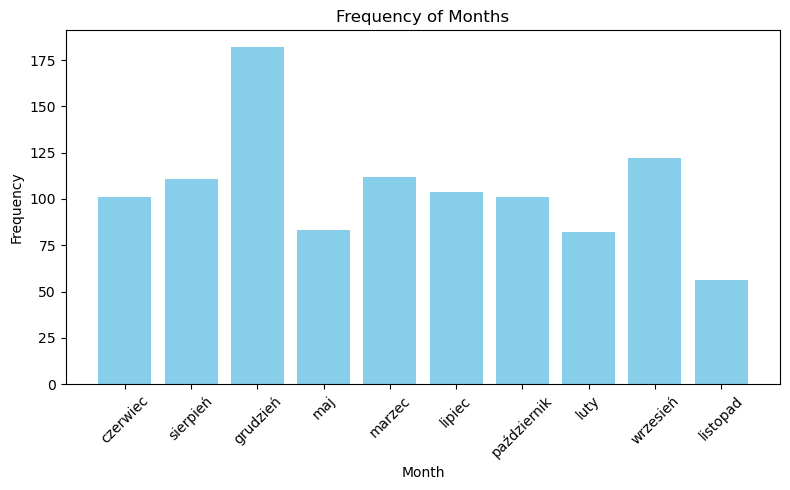

In [15]:
xs, ys = zip(*month_counts.items())

plt.figure(figsize=(8,5)) 
plt.bar(xs, ys, color='skyblue')

plt.title("Frequency of Months")
plt.xlabel("Month")
plt.ylabel("Frequency")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()